# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [11]:
# Criando duas faixas de Latitude do município
sinasc_raw.columns
sinasc_raw.loc[sinasc_raw['munResLat'] > -10.5,'catMunResLat'] = 'Acima de -10.5'
sinasc_raw.loc[sinasc_raw['munResLat'] < -10.5,'catMunResLat'] = 'Abaixo de -10.5'

sinasc_raw['catMunResLat'].value_counts()

Acima de -10.5     14034
Abaixo de -10.5    12993
Name: catMunResLat, dtype: int64

In [24]:

sinasc_2 = sinasc_raw[['catMunResLat','QTDPARTNOR','QTDPARTCES','QTDFILMORT']]
sinasc_2.groupby('catMunResLat').aggregate([sum, np.mean, min, max, np.median, np.std, np.var])


QTDPARTNOR                                                  \
                       sum      mean  min   max median       std       var   
catMunResLat                                                                 
Abaixo de -10.5     5800.0  0.452242  0.0  41.0    0.0  1.123426  1.262087   
Acima de -10.5      8771.0  0.711759  0.0  40.0    0.0  1.279042  1.635949   

                QTDPARTCES                 ...                             \
                       sum      mean  min  ... median       std       var   
catMunResLat                               ...                              
Abaixo de -10.5     7095.0  0.552570  0.0  ...    0.0  0.753036  0.567062   
Acima de -10.5      6041.0  0.487335  0.0  ...    0.0  0.737899  0.544495   

                QTDFILMORT                                                  
                       sum      mean  min   max median       std       var  
catMunResLat                                                                
Abaixo de -10.5     3105.0  0.242521  0.0  28.0    0.0  0.599430  0.359317  
Acima de -10.5      3538.0  0.291770  0.0   9.0    0.0  0.627856  0.394204  

[2 rows x 21 columns]

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [28]:
sinasc_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [32]:
sinasc_raw.loc[sinasc_raw['munResArea'] > 3000, 'catMunResArea'] = 'Acima de 3000'
sinasc_raw.loc[sinasc_raw['munResArea'] < 3000, 'catMunResArea'] = 'Abaixo de 3000'

sinasc_raw['catMunResArea'].value_counts()

Acima de 3000     21808
Abaixo de 3000     5219
Name: catMunResArea, dtype: int64

In [36]:
sinasc_2_1 = sinasc_raw[['catMunResArea','PESO','SEMAGESTAC']]
 
sinasc_2_1.groupby('catMunResArea').aggregate([sum, np.mean, min, max, np.median, np.std, np.var])

PESO                                             \
                     sum         mean  min   max median         std   
catMunResArea                                                         
Abaixo de 3000  16796616  3218.359073  258  5720   3245  531.583103   
Acima de 3000   70857126  3249.134538  292  5985   3280  547.716582   

                              SEMAGESTAC                                \
                          var        sum       mean   min   max median   
catMunResArea                                                            
Abaixo de 3000  282580.595074   197469.0  38.470485  21.0  45.0   39.0   
Acima de 3000   299993.453720   797147.0  38.591547  19.0  45.0   39.0   

                                    
                     std       var  
catMunResArea                       
Abaixo de 3000  1.874927  3.515350  
Acima de 3000   2.049838  4.201834

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [37]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [97]:
sinasc_raw.loc[sinasc_raw['munResAlt'] < 87, 'catMunResAlt'] = 'Abaixo de 87'
sinasc_raw.loc[(sinasc_raw['munResAlt'] >= 87) & (sinasc_raw['munResAlt'] < 153), 'catMunResAlt'] = 'Entre 87 e 153'
sinasc_raw.loc[(sinasc_raw['munResAlt'] >= 153) & (sinasc_raw['munResAlt'] < 191), 'catMunResAlt'] = 'Entre 153 e 191'
sinasc_raw.loc[sinasc_raw['munResAlt'] >= 191, 'catMunResAlt'] = 'Acima de 191'

sinasc_raw['catMunResAlt'].value_counts()


pandas.core.frame.DataFrame

In [51]:
sinasc_2_3 = sinasc_raw[['catMunResAlt','PESO','IDADEPAI']]
 
sinasc_2_3.groupby('catMunResAlt').aggregate([sum, np.mean, min, max, np.median, np.std, np.var])

PESO                                              \
                      sum         mean   min   max median         std   
catMunResAlt                                                            
Abaixo de 87      1110855  3296.305638  1180  5135   3325  551.831683   
Acima de 191     22172498  3220.874201   258  5985   3255  539.223855   
Entre 153 e 191  23134858  3256.596002   292  5480   3270  516.961811   
Entre 87 e 153   41235531  3246.380964   295  5070   3280  562.085653   

                                IDADEPAI                                \
                           var       sum       mean   min   max median   
catMunResAlt                                                             
Abaixo de 87     304518.206903     568.0  29.894737  21.0  41.0   30.0   
Acima de 191     290762.366273   98737.0  31.049371  16.0  86.0   30.0   
Entre 153 e 191  267249.513519  107751.0  30.865368  15.0  70.0   30.0   
Entre 87 e 153   315940.281830   29442.0  32.141921  16.0  73.0   32.0   

                                      
                      std        var  
catMunResAlt                          
Abaixo de 87     5.924476  35.099415  
Acima de 191     7.611874  57.940626  
Entre 153 e 191  7.817817  61.118259  
Entre 87 e 153   8.091117  65.466175

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [52]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal", 
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [212]:
sinasc_4 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']]

sinasc_4_1 = sinasc_4['munResNome'].map(imediatas)
sinasc_4_1 = sinasc_4_1.to_frame(name='catImediatas')
sinasc_4_1['id'] = sinasc_4_1.index
sinasc_4_1


,catImediatas,id
0,Cacoal,0
1,Cacoal,1
2,Cacoal,2
3,Cacoal,3
4,Cacoal,4
...,...,...
27023,Vilhena,27023
27024,Vilhena,27024
27025,Vilhena,27025
27026,Vilhena,27026


In [244]:
sinasc_4_2 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']]
sinasc_4_2.reset_index(level=0, inplace=True)
sinasc_4_2 = sinasc_4_2.rename(columns={'index': 'id'})
sinasc_4_2

,id,munResNome,IDADEMAE,DTNASC
0,0,Alta Floresta D'Oeste,19,2019-02-19
1,1,Alta Floresta D'Oeste,29,2019-02-21
2,2,Alta Floresta D'Oeste,37,2019-02-25
3,3,Alto Alegre dos Parecis,30,2019-03-20
4,4,Alta Floresta D'Oeste,30,2019-03-23
...,...,...,...,...
27023,27023,Vilhena,32,2019-12-13
27024,27024,Chupinguaia,19,2019-10-04
27025,27025,Vilhena,24,2019-08-02
27026,27026,Vilhena,21,2019-12-23


In [263]:
sinasc_4_3 = sinasc_4_2.merge(sinasc_4_1, on='id', how='inner')
sinasc_4_3

,id,munResNome,IDADEMAE,DTNASC,catImediatas
0,0,Alta Floresta D'Oeste,19,2019-02-19,Cacoal
1,1,Alta Floresta D'Oeste,29,2019-02-21,Cacoal
2,2,Alta Floresta D'Oeste,37,2019-02-25,Cacoal
3,3,Alto Alegre dos Parecis,30,2019-03-20,Cacoal
4,4,Alta Floresta D'Oeste,30,2019-03-23,Cacoal
...,...,...,...,...,...
27023,27023,Vilhena,32,2019-12-13,Vilhena
27024,27024,Chupinguaia,19,2019-10-04,Vilhena
27025,27025,Vilhena,24,2019-08-02,Vilhena
27026,27026,Vilhena,21,2019-12-23,Vilhena


In [265]:
sinasc_4_3.loc[:,'DTNASC'] = pd.to_datetime(sinasc_4_3['DTNASC'])


In [266]:
#sinasc_4_3.set_index('DTNASC', inplace=True)
#sinasc_4_3

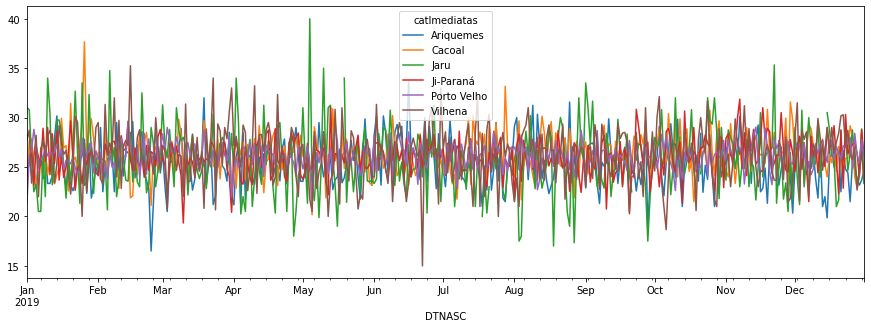

In [267]:
sinasc_4_3.groupby(['DTNASC', 'catImediatas'])['IDADEMAE'].mean().unstack().plot(figsize=[15,5]);

In [268]:
sinasc_4_3.groupby(['catImediatas'])['IDADEMAE'].mean()

catImediatas
Ariquemes      25.459635
Cacoal         26.347817
Jaru           25.708853
Ji-Paraná      26.094720
Porto Velho    26.166303
Vilhena        26.417143
Name: IDADEMAE, dtype: float64

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [272]:
idh = {
"Porto Velho":"IDH-M alto",
"Vilhena":"IDH-M alto",
"Cacoal":"IDH-M alto",
"Ji-Paraná":"IDH-M alto",
"Pimenta Bueno":"IDH-M alto",
"Ariquemes":"IDH-M alto",
"Rolim de Moura":"IDH-M alto",
"Cerejeiras":"IDH-M médio",
"Jaru":"IDH-M médio",
"Colorado do Oeste":"IDH-M médio",
"Ouro Preto do Oeste":"IDH-M médio",
"Espigão d'Oeste":"IDH-M médio",
"Santa Luzia d'Oeste":"IDH-M médio",
"Pimenteiras do Oeste":"IDH-M médio",
"Presidente Médici":"IDH-M médio",
"Castanheiras":"IDH-M médio",
"Guajará-Mirim":"IDH-M médio",
"Chupinguaia":"IDH-M médio",
"Cabixi":"IDH-M médio",
"Candeias do Jamari":"IDH-M médio",
"São Felipe d'Oeste":"IDH-M médio",
"Cacaulândia":"IDH-M médio",
"São Miguel do Guaporé":"IDH-M médio",
"Mirante da Serra":"IDH-M médio",
"Alvorada d'Oeste":"IDH-M médio",
"Teixeirópolis":"IDH-M médio",
"Nova Brasilândia d'Oeste":"IDH-M médio",
"Rio Crespo":"IDH-M médio",
"Primavera de Rondônia":"IDH-M médio",
"Alta Floresta d'Oeste":"IDH-M médio",
"Ministro Andreazza":"IDH-M médio",
"Novo Horizonte do Oeste":"IDH-M médio",
"Vale do Paraíso":"IDH-M médio",
"Alto Paraíso":"IDH-M médio",
"Parecis":"IDH-M médio",
"Buritis":"IDH-M médio",
"Itapuã do Oeste":"IDH-M médio",
"Corumbiara":"IDH-M médio",
"Cujubim":"IDH-M médio",
"Costa Marques":"IDH-M médio",
"São Francisco do Guaporé":"IDH-M médio",
"Urupá":"IDH-M médio",
"Monte Negro":"IDH-M médio",
"Seringueiras":"IDH-M baixo",
"Governador Jorge Teixeira":"IDH-M baixo",
"Machadinho d'Oeste":"IDH-M baixo",
"Campo Novo de Rondônia":"IDH-M baixo",
"Alto Alegre dos Parecis":"IDH-M baixo",
"Theobroma":"IDH-M baixo",
"Nova União":"IDH-M baixo",
"Nova Mamoré":"IDH-M baixo",
"Vale do Anari":"IDH-M baixo"
}

In [275]:
sinasc_5 = sinasc_raw[['IDADEMAE','QTDFILVIVO','QTDFILMORT','munResNome']]
sinasc_5 = sinasc_5.set_index('munResNome')

In [299]:
sinasc_5.groupby(idh).aggregate(['min', np.median, np.mean, max, sum])


IDADEMAE                               QTDFILVIVO         \
                 min median       mean max     sum        min median   
IDH-M alto        12     26  26.280332  47  442955        0.0    1.0   
IDH-M baixo       13     25  25.269231  46   33507        0.0    1.0   
IDH-M médio       11     25  25.848191  53  178611        0.0    1.0   

                                     QTDFILMORT                                 
                 mean   max      sum        min median      mean   max     sum  
IDH-M alto   1.033960  12.0  16228.0        0.0    0.0  0.272297  28.0  4201.0  
IDH-M baixo  1.056270   8.0   1314.0        0.0    0.0  0.253521   6.0   306.0  
IDH-M médio  1.093111  14.0   7220.0        0.0    0.0  0.272386   7.0  1743.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [280]:
ifdm = {
    "Ariquemes":"Desenvolvimento moderado",
    "Vilhena":"Desenvolvimento moderado",
    "Pimenta Bueno":"Desenvolvimento moderado",
    "Porto Velho":"Desenvolvimento moderado",
    "Ji-Paraná":"Desenvolvimento moderado",
    "Cacoal":"Desenvolvimento moderado",
    "Santa Luzia d'Oeste":"Desenvolvimento moderado",
    "Rolim de Moura":"Desenvolvimento moderado",
    "Chupinguaia":"Desenvolvimento moderado",
    "São Miguel do Guaporé":"Desenvolvimento moderado",
    "Pimenteiras do Oeste":"Desenvolvimento moderado",
    "Teixeirópolis":"Desenvolvimento moderado",
    "Colorado do Oeste":"Desenvolvimento moderado",
    "Jaru":"Desenvolvimento moderado",
    "Rio Crespo":"Desenvolvimento moderado",
    "Primavera de Rondônia":"Desenvolvimento moderado",
    "Alta Floresta d'Oeste":"Desenvolvimento moderado",
    "Ouro Preto do Oeste":"Desenvolvimento moderado",
    "São Francisco do Guaporé":"Desenvolvimento moderado",
    "Candeias do Jamari":"Desenvolvimento moderado",
    "Espigão d'Oeste":"Desenvolvimento regular",
    "Seringueiras":"Desenvolvimento regular",
    "Alvorada d'Oeste":"Desenvolvimento regular",
    "Itapuã do Oeste":"Desenvolvimento regular",
    "Cabixi":"Desenvolvimento regular",
    "Novo Horizonte do Oeste":"Desenvolvimento regular",
    "Nova Brasilândia d'Oeste":"Desenvolvimento regular",
    "Vale do Paraíso":"Desenvolvimento regular",
    "Corumbiara":"Desenvolvimento regular",
    "Alto Paraíso":"Desenvolvimento regular",
    "Cacaulândia":"Desenvolvimento regular",
    "Vale do Anari":"Desenvolvimento regular",
    "Ministro Andreazza":"Desenvolvimento regular",
    "Costa Marques":"Desenvolvimento regular",
    "Nova União":"Desenvolvimento regular",
    "Guajará-Mirim":"Desenvolvimento regular",
    "Mirante da Serra":"Desenvolvimento regular",
    "Parecis":"Desenvolvimento regular",
    "Castanheiras":"Desenvolvimento regular",
    "Theobroma":"Desenvolvimento regular",
    "Machadinho d'Oeste":"Desenvolvimento regular",
    "Campo Novo de Rondônia":"Desenvolvimento regular",
    "Nova Mamoré":"Desenvolvimento regular",
    "Cujubim":"Desenvolvimento regular",
    "Alto Alegre dos Parecis":"Desenvolvimento regular",
    "Governador Jorge Teixeira":"Desenvolvimento regular"    
}

In [281]:
sinasc_5_1 = sinasc_raw[['IDADEMAE','QTDFILVIVO','QTDFILMORT','munResNome']]
sinasc_5_1 = sinasc_5_1.set_index('munResNome')

In [296]:
sinasc_5_1.groupby(ifdm).aggregate(['min', np.median, np.mean, max, sum])

IDADEMAE                               QTDFILVIVO  \
                              min median       mean max     sum        min   
Desenvolvimento moderado       12     26  26.242813  47  523098        0.0   
Desenvolvimento regular        11     25  25.412005  52   93135        0.0   

                                                         QTDFILMORT         \
                         median      mean   max      sum        min median   
Desenvolvimento moderado    1.0  1.026930  12.0  19219.0        0.0    0.0   
Desenvolvimento regular     1.0  1.172404  14.0   4155.0        0.0    0.0   

                                                  
                              mean   max     sum  
Desenvolvimento moderado  0.269104  28.0  4962.0  
Desenvolvimento regular   0.264967   7.0   925.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [291]:
pib = {
    "Porto Velho":"1 - Acima de 1 Bilhão",
    "Ji-Paraná":"1 - Acima de 1 Bilhão",
    "Vilhena":"1 - Acima de 1 Bilhão",
    "Ariquemes":"1 - Acima de 1 Bilhão",
    "Cacoal":"1 - Acima de 1 Bilhão",
    "Jaru":"1 - Acima de 1 Bilhão",
    "Rolim de Moura":"1 - Acima de 1 Bilhão",
    "Pimenta Bueno":"1 - Acima de 1 Bilhão",
    "Guajará-Mirim":"2 - Acima de 500 Milhões",
    "Ouro Preto do Oeste":"2 - Acima de 500 Milhões",
    "Buritis":"2 - Acima de 500 Milhões",
    "Machadinho do Oeste":"2 - Acima de 500 Milhões",
    "Espigão d'Oeste":"2 - Acima de 500 Milhões",
    "São Miguel do Guaporé":"2 - Acima de 500 Milhões",
    "Candeias do Jamari":"2 - Acima de 500 Milhões",
    "Nova Mamoré":"2 - Acima de 500 Milhões",
    "Cerejeiras":"2 - Acima de 500 Milhões",
    "Alta Floresta do Oeste":"3 - Acima de 300 Milhões",
    "Presidente Médici":"3 - Acima de 300 Milhões",
    "Cujubim":"3 - Acima de 300 Milhões",
    "Nova Brasilândia do Oeste":"3 - Acima de 300 Milhões",
    "Alto Paraíso":"3 - Acima de 300 Milhões",
    "São Francisco do Guaporé":"3 - Acima de 300 Milhões",
    "Colorado do Oeste":"3 - Acima de 300 Milhões",
    "Monte Negro":"4 - Acima de 200 Milhões",
    "Alto Alegre dos Parecis":"4 - Acima de 200 Milhões",
    "Campo Novo de Rondônia":"4 - Acima de 200 Milhões",
    "Alvorada do Oeste":"4 - Acima de 200 Milhões",
    "Chupinguaia":"5 - Acima de 100 Milhões",
    "Corumbiara":"5 - Acima de 100 Milhões",
    "Ministro Andreazza":"5 - Acima de 100 Milhões",
    "Urupá":"5 - Acima de 100 Milhões",
    "Costa Marques":"5 - Acima de 100 Milhões",
    "Seringueiras":"5 - Acima de 100 Milhões",
    "Mirante da Serra":"5 - Acima de 100 Milhões",
    "Governador Jorge Teixeira":"5 - Acima de 100 Milhões",
    "Theobroma":"5 - Acima de 100 Milhões",
    "Santa Luzia do Oeste":"5 - Acima de 100 Milhões",
    "Novo Horizonte do Oeste":"5 - Acima de 100 Milhões",
    "Itapuã do Oeste":"5 - Acima de 100 Milhões",
    "Vale do Paraíso":"5 - Acima de 100 Milhões",
    "Cacaulândia":"5 - Acima de 100 Milhões",
    "Cabixi":"5 - Acima de 100 Milhões",
    "Vale do Anari":"5 - Acima de 100 Milhões",
    "Nova União":"6 - Até 100 Milhões",
    "Parecis":"6 - Até 100 Milhões",
    "Rio Crespo":"6 - Até 100 Milhões",
    "Pimenteiras do Oeste":"6 - Até 100 Milhões",
    "Teixeirópolis":"6 - Até 100 Milhões",
    "São Felipe do Oeste":"6 - Até 100 Milhões",
    "Castanheiras":"6 - Até 100 Milhões",
    "Primavera de Rondônia":"6 - Até 100 Milhões"
}

In [292]:
sinasc_5_2 = sinasc_raw[['IDADEMAE','QTDFILVIVO','QTDFILMORT','munResNome']]
sinasc_5_2 = sinasc_5_2.set_index('munResNome')


In [298]:
sinasc_5_2.groupby(pib).aggregate(['min', np.median, np.mean, max, sum])

IDADEMAE                               QTDFILVIVO  \
                              min median       mean max     sum        min   
1 - Acima de 1 Bilhão          12     26  26.265562  47  465846        0.0   
2 - Acima de 500 Milhões       13     25  25.785927  53   86486        0.0   
3 - Acima de 300 Milhões       11     25  25.706070  47   32184        0.0   
4 - Acima de 200 Milhões       13     25  25.146435  41   13051        0.0   
5 - Acima de 100 Milhões       12     25  25.638424  52   47508        0.0   
6 - Até 100 Milhões            14     26  26.519894  41    9998        0.0   

                                                         QTDFILMORT         \
                         median      mean   max      sum        min median   
1 - Acima de 1 Bilhão       1.0  1.026435  12.0  17007.0        0.0    0.0   
2 - Acima de 500 Milhões    1.0  1.228385  11.0   3765.0        0.0    0.0   
3 - Acima de 300 Milhões    1.0  1.062097   8.0   1317.0        0.0    0.0   
4 - Acima de 200 Milhões    1.0  1.010526   7.0    480.0        0.0    0.0   
5 - Acima de 100 Milhões    1.0  0.992320  14.0   1809.0        0.0    0.0   
6 - Até 100 Milhões         1.0  1.032258   6.0    384.0        0.0    0.0   

                                                  
                              mean   max     sum  
1 - Acima de 1 Bilhão     0.270229  28.0  4405.0  
2 - Acima de 500 Milhões  0.319958   7.0   917.0  
3 - Acima de 300 Milhões  0.251828   5.0   310.0  
4 - Acima de 200 Milhões  0.263982   4.0   118.0  
5 - Acima de 100 Milhões  0.239824   6.0   436.0  
6 - Até 100 Milhões       0.172507   2.0    64.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

### Insight

#### A média da quantidade de filhos vivos é maior nos municípios com o  IDH Médio, IFDM - Desenvolvimento Regular e PIB Acima de 500 milhões .
- É de se notar que a maior quantidade de filhos vivos não está nas faixas mais altas e nem nas mais baixa e sim nas faixas médias.
